# <center> **🛫 Flight Fare Prediction Using Machine Learning on Airline Booking Data** <center>

# **🧾 Problem Statement**

Airfare pricing is highly dynamic and influenced by various factors such as travel routes, airline carriers, number of stops, and added services like meals.  
Accurately predicting flight fares is a major challenge in the travel industry due to these complex dependencies.  
This project focuses on analyzing a real-world flight booking dataset sourced from the EaseMyTrip platform.  
By exploring key features such as **source**, **destination**, **route**, **airline**, and **meal inclusion**, we aim to gain meaningful insights and develop predictive models that estimate flight prices more effectively.


![41822.jpg](attachment:47c97534-67e6-4126-81d8-59bb78152767.jpg)

# **🎯 Objective**

To develop a **Machine Learning model** that:

- 🔍 **Predicts the flight fare** based on customer booking information  
- ✈️ Uses key travel features including:
  - 🛫 Source  
  - 🛬 Destination  
  - 🛣️ Route  
  - ⛔ Total Stops  
  - 🛩️ Airline  
  - 🍽️ Meal Inclusion  
- 📈 Applies regression algorithms such as:
  - Linear Regression  
  - Random Forest Regressor  
  - Other ML regression models  
- 📊 Performs Exploratory Data Analysis and Hypothesis Testing to understand pricing patterns  
- 💡 Helps users and businesses make informed decisions by understanding fare drivers and optimizing travel planning


# **1️⃣ Import Necessary libraries**

In [8]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# **2️⃣ Data Loading and Preview**

In [10]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 25)

In [11]:
df = pd.read_excel("airline_dataset.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# **3️⃣ Data Overview & Cleaning**

In [14]:
df.shape

(10683, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [16]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [17]:
import dtale

In [18]:
dtale.show(df)

In [19]:
df.isnull().sum()/len(df)*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()/len(df)*100

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

In [22]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [24]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

# **4️⃣ Feature Engineering**

In [26]:
df['journey_day'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [27]:
df['journey_month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [28]:
df['journey_year'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

In [29]:
df.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [30]:
df['journey_year'].value_counts()

journey_year
2019    10682
Name: count, dtype: int64

In [31]:
df.drop(['Date_of_Journey','journey_year'], axis=1, inplace=True)

In [32]:
df['dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [33]:
df.drop(['Dep_Time'], axis=1, inplace=True)

In [34]:
df['arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [35]:
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [36]:
list(df['Duration'])

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [37]:
len(list(df['Duration']))

10682

In [38]:
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [39]:
df['duration_hour'] = duration_hours
df['duration_mins'] = duration_mins

In [40]:
df.drop(['Duration'], axis=1, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_day      10682 non-null  int32 
 8   journey_month    10682 non-null  int32 
 9   dep_hour         10682 non-null  int32 
 10  dep_min          10682 non-null  int32 
 11  arr_hour         10682 non-null  int32 
 12  arr_min          10682 non-null  int32 
 13  duration_hour    10682 non-null  int64 
 14  duration_mins    10682 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


In [42]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

# **5️⃣ Exploratory Data Analysis (EDA)** 

In [44]:
# Set Seaborn style
sns.set_style('white') 

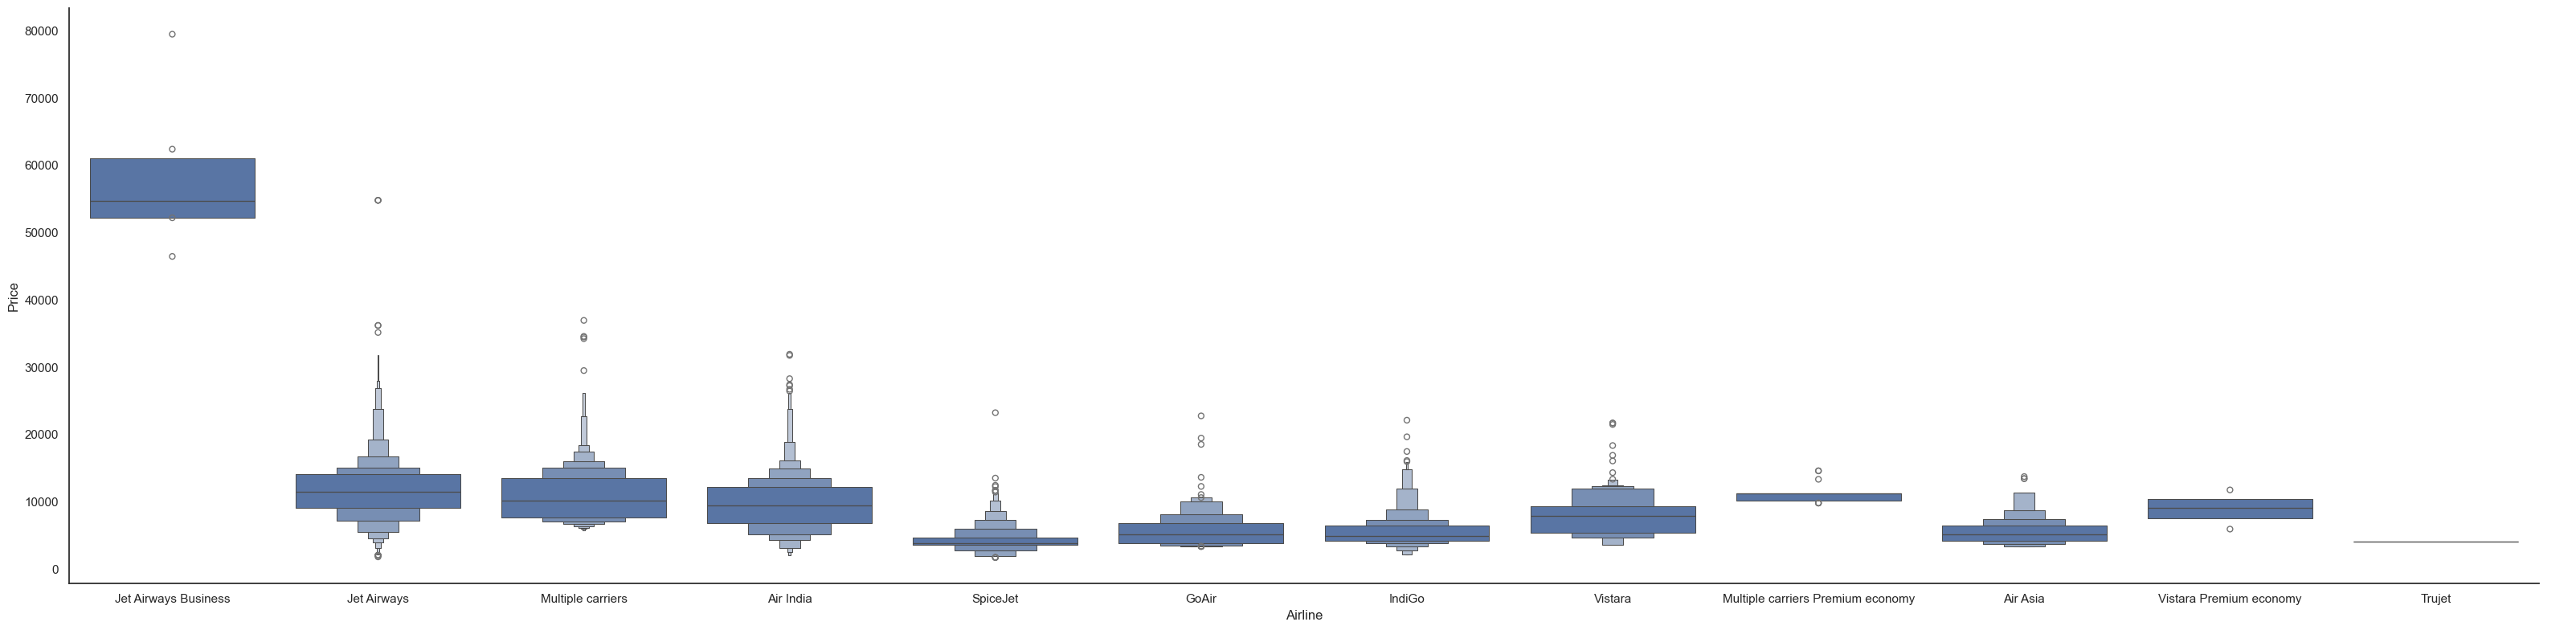

In [45]:
sns.catplot(y='Price', x='Airline', data=df.sort_values('Price', ascending=False), kind='boxen', height=8, aspect=4)
plt.show()

#### ✈️ Airline vs Price
- **Jet Airways Business** has the highest ticket prices with a median around ₹55,000–₹60,000.
- **Jet Airways**, **Multiple carriers**, and **Air India** offer mid-range fares between ₹8,000–₹15,000.
- **Low-cost carriers** like **SpiceJet**, **GoAir**, **IndiGo**, and **Air Asia** have relatively lower ticket prices.
- **Vistara Premium Economy**, **Multiple carriers Premium Economy**, and **Trujet** offer niche services with smaller sample sizes but noticeable consistency in pricing.
- 

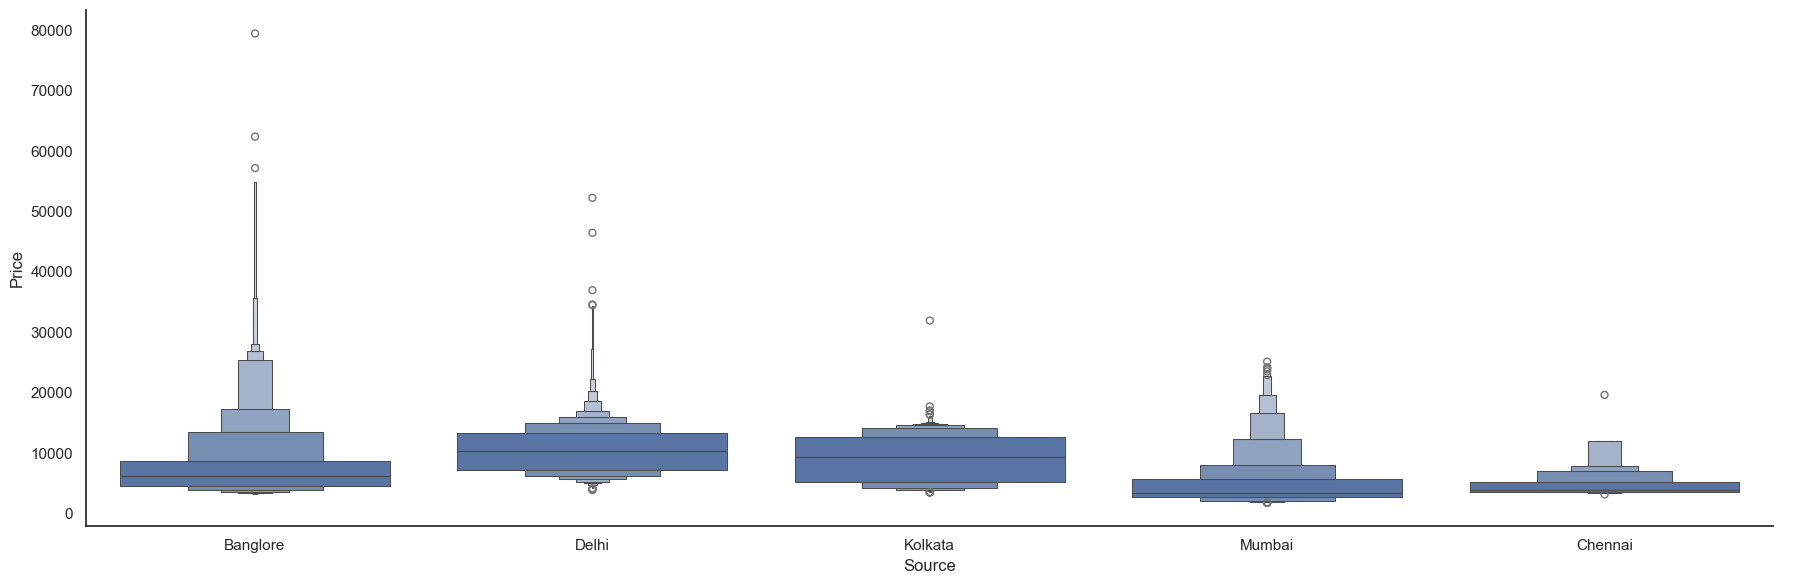

In [46]:
sns.catplot(y='Price', x='Source', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

#### 🧭 Destination vs Price
- **New Delhi** and **Cochin** destinations have the widest price range, with several high-value outliers above ₹40,000.
- **Banglore** and **Hyderabad** follow a similar mid-range pricing pattern.
- **Kolkata** and **Delhi** are more consistent with lower median fares and fewer outliers, indicating stable pricing.


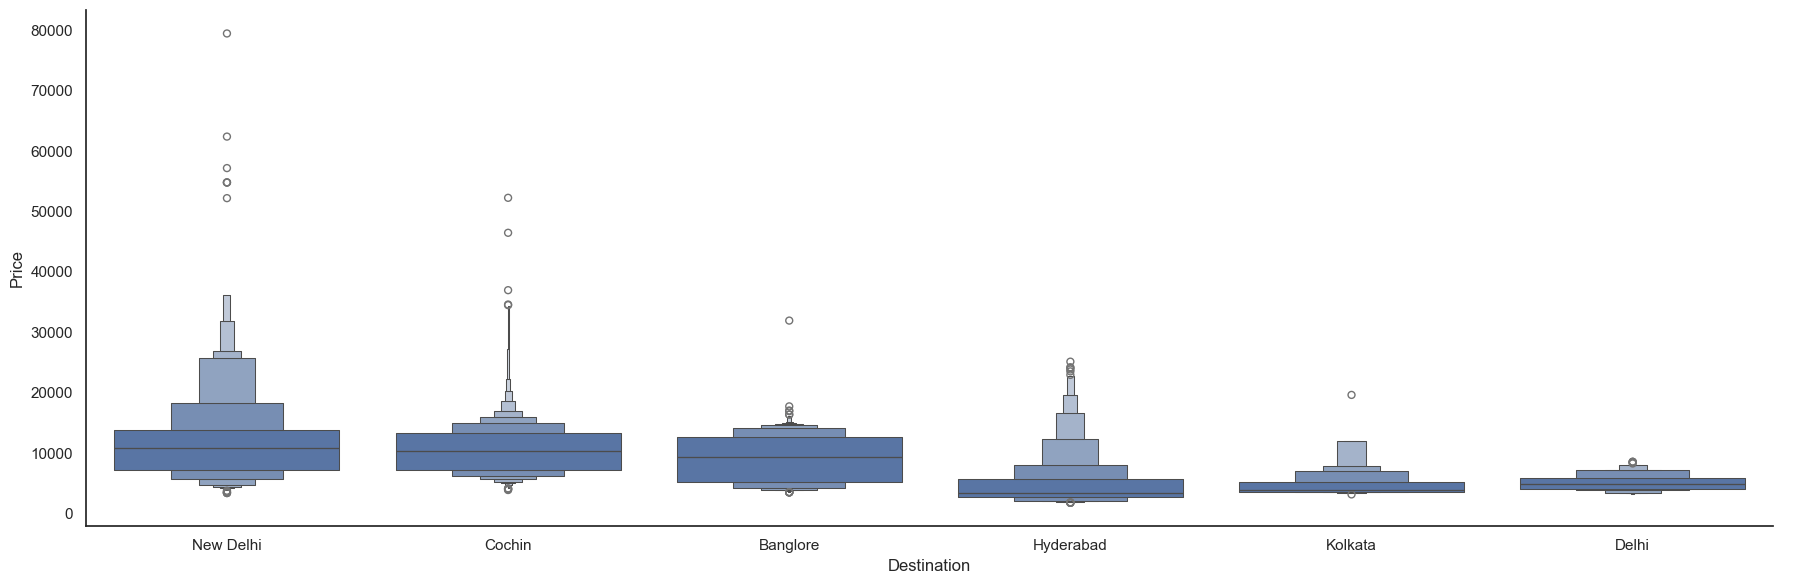

In [47]:
sns.catplot(y='Price', x='Destination', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

#### 🛫 Source vs Price
- **Banglore** and **Delhi** sources show high variation and some extreme outliers, likely due to business class or long-haul combinations.
- **Kolkata** and **Mumbai** sources have relatively moderate prices.
- **Chennai** emerges as the most budget-friendly departure city with the narrowest fare range.


📌 **Overall Insight**:  
Flight prices are significantly influenced by airline type (luxury vs budget), source city, and destination. Outliers in each category indicate the presence of premium services (e.g., business class) or longer durations.


# **6️⃣ Feature Scaling**

In [49]:
Airline1 = df[['Airline']]
Airline1 = pd.get_dummies(Airline1, drop_first=True, dtype='int64')
Airline1.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [50]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [51]:
Source1 = df[['Source']]
Source1 = pd.get_dummies(Source1, drop_first=True, dtype='int64')
Source1.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [53]:
df["Destination"] = np.where(df["Destination"]=='New Delhi','Delhi',df["Destination"])

In [54]:
Destination1 = df[['Destination']]
Destination1 = pd.get_dummies(Destination1, drop_first=True, dtype='int64')
Destination1.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [55]:
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [56]:
df['Route'].nunique()

128

In [57]:
df.drop(['Route'], axis=1, inplace=True)

In [58]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [59]:
df.replace({"non-stop": 0,"1 stop":1, "2 stops":2,"3 stops":3,"4 stops":4}, inplace=True)

In [60]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [61]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins
0,IndiGo,Banglore,Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25


In [62]:
df['Additional_Info'].value_counts(normalize=True)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: proportion, dtype: float64

In [63]:
df.drop(['Additional_Info'], axis=1, inplace=True)

In [64]:
final_df = pd.concat([df, Airline1,Source1, Destination1], axis=1)

In [65]:
final_df.drop(['Airline','Source','Destination'], axis=1, inplace=True)

In [66]:
final_df.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   journey_day                                10682 non-null  int32
 3   journey_month                              10682 non-null  int32
 4   dep_hour                                   10682 non-null  int32
 5   dep_min                                    10682 non-null  int32
 6   arr_hour                                   10682 non-null  int32
 7   arr_min                                    10682 non-null  int32
 8   duration_hour                              10682 non-null  int64
 9   duration_mins                              10682 non-null  int64
 10  Airline_Air India                          10682 no

# **🧮 Correlation Heatmap**

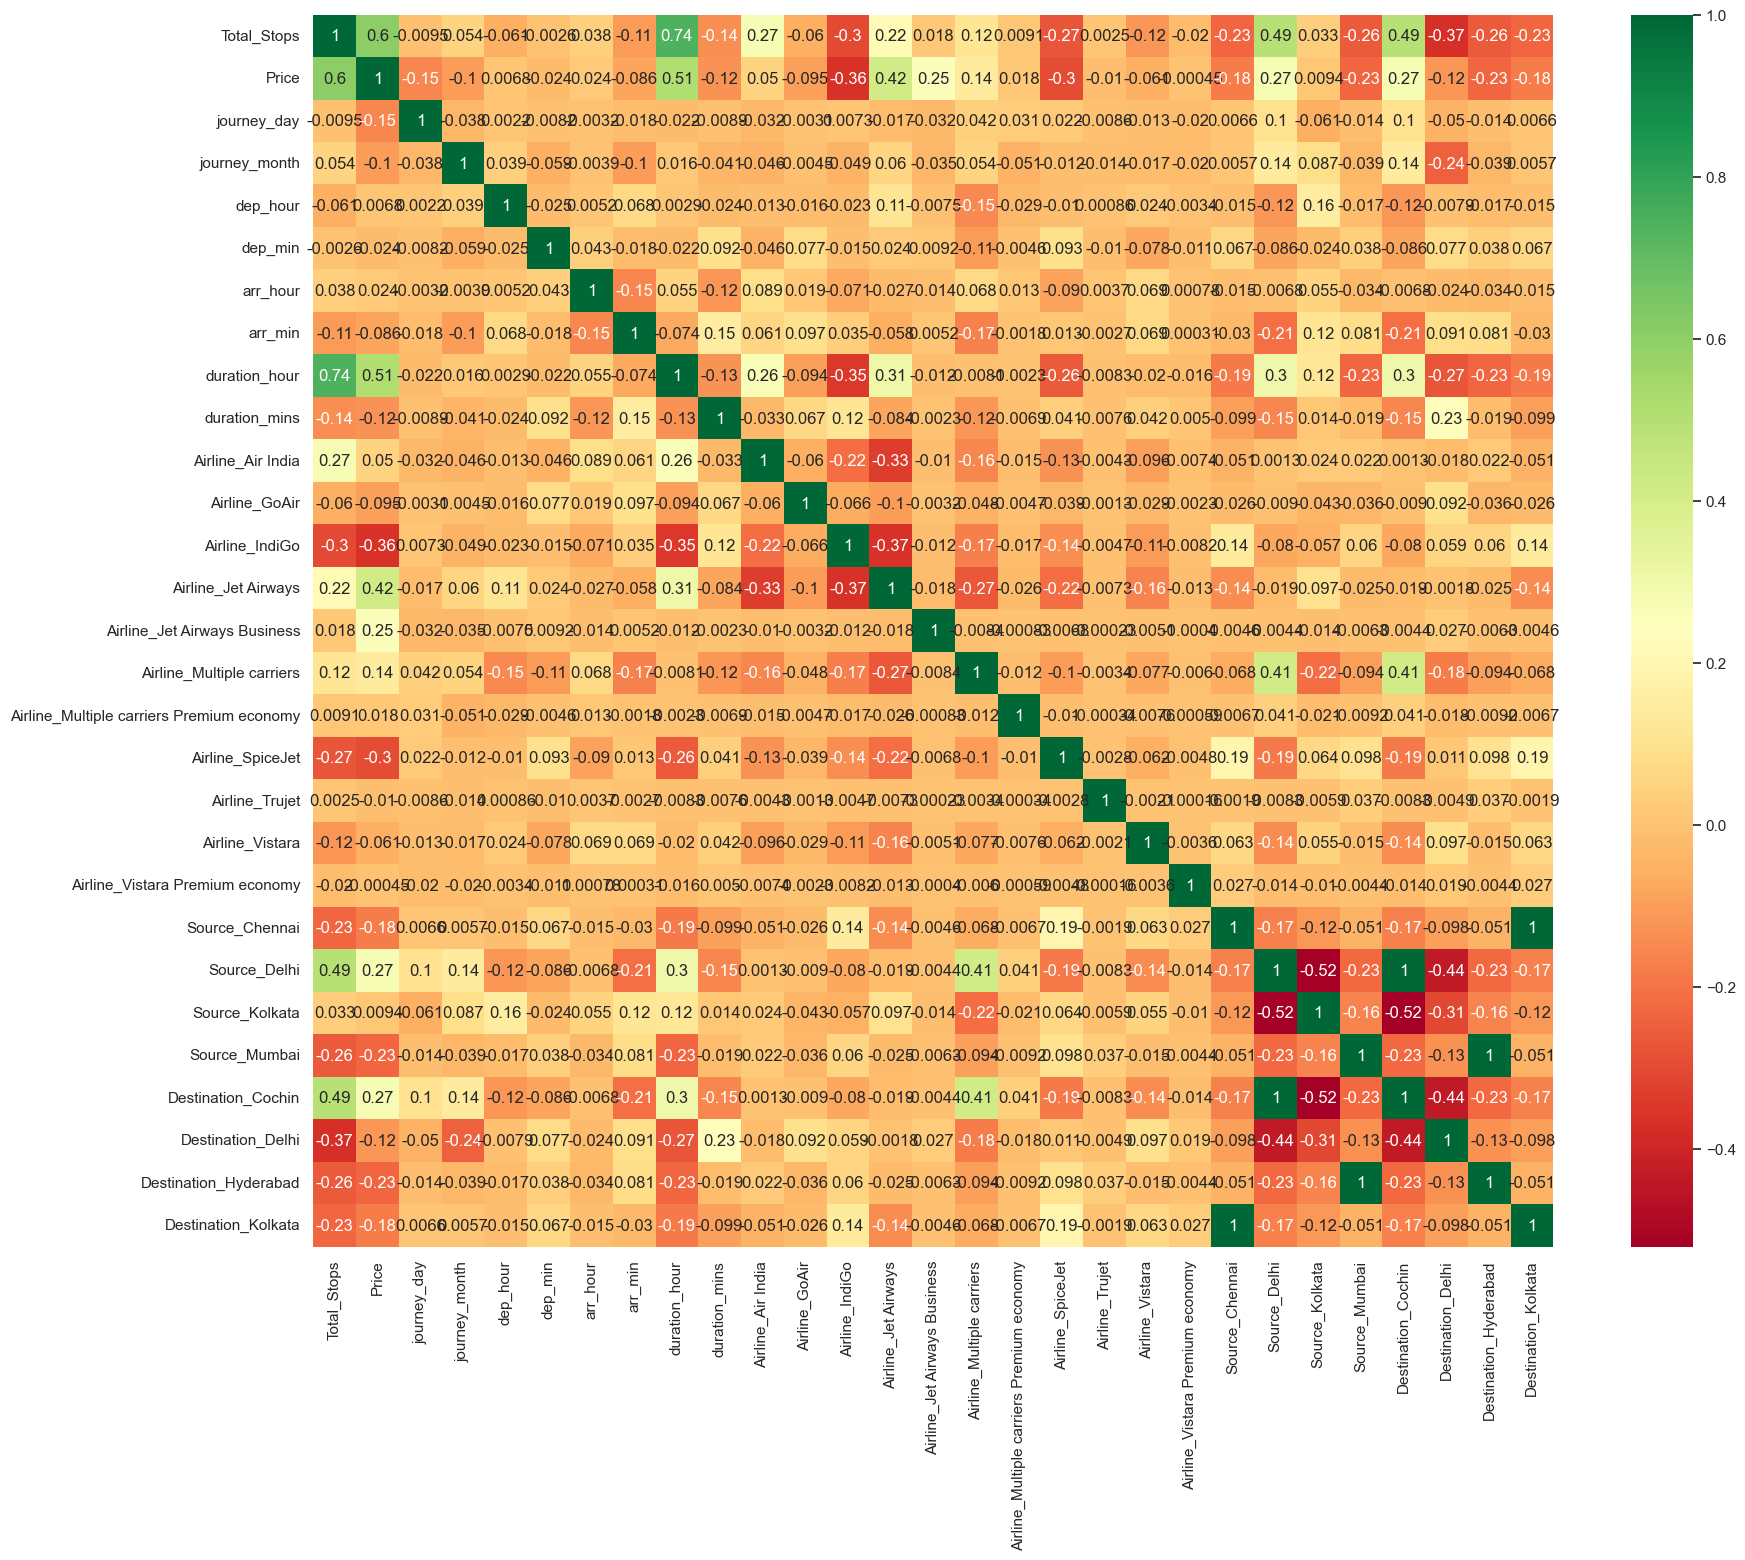

In [69]:
plt.figure(figsize=(20,16))
sns.heatmap(final_df.corr(), annot=True, cmap="RdYlGn")
plt.savefig("heatmap.png")
plt.show()

# **7️⃣ Train-Test Split**

In [71]:
# split the data into dep and indep variables
X = final_df.drop(['Price'],axis=1)
y = final_df['Price']

In [72]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [74]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [75]:
final_df['Price'].value_counts(normalize=True) * 100

Price
10262    2.415278
10844    1.984647
7229     1.516570
4804     1.497847
4823     1.226362
           ...   
14153    0.009362
8488     0.009362
7826     0.009362
6315     0.009362
12648    0.009362
Name: proportion, Length: 1870, dtype: float64

# **8️⃣ Model Building**

## **Linear Regression**

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred_train_lr =lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [80]:
# Evaluation
print("********** Linear Regression **********")

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train,y_pred_train_lr))
print('Testing_Accuracy (R²): ',r2_score(y_test,y_pred_test_lr))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_lr))
print("MSE:", mean_squared_error(y_test, y_pred_test_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_lr)))


********** Linear Regression **********
Training_Accuracy (R²):  0.6137360978467021
Testing_Accuracy (R²):  0.599957628935733
MAE: 1995.9354834915582
MSE: 8625736.136938952
RMSE: 2936.9603567189924


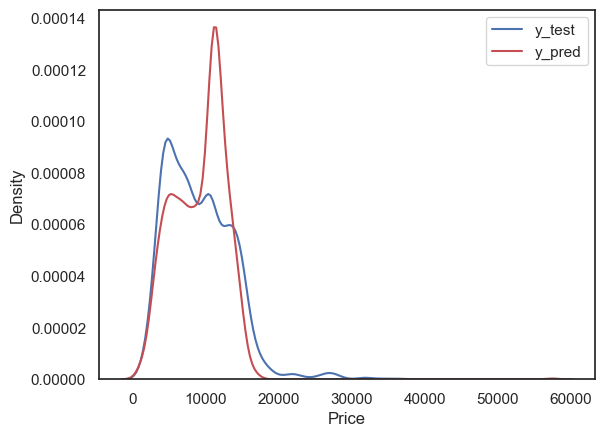

In [81]:
# Actual vs Predicted graph 
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_lr, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

## **Decision Tree Regressor**

In [83]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [84]:
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

In [85]:
# Evaluation
print("********** Decision Tree Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train,y_pred_train_dt))
print('Testing_Accuracy (R²): ',r2_score(y_test,y_pred_test_dt))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_dt))
print("MSE:", mean_squared_error(y_test, y_pred_test_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_dt)))


********** Decision Tree Regressor **********
Training_Accuracy (R²):  0.9692484150527355
Testing_Accuracy (R²):  0.7291865985812713
MAE: 1331.4882623615663
MSE: 5839293.814728461
RMSE: 2416.4630795293483


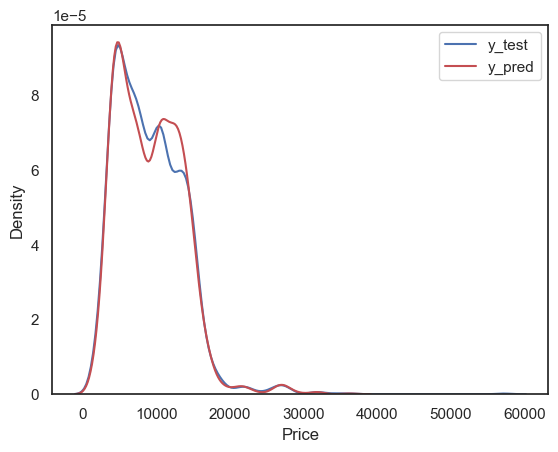

In [86]:
# Actual vs Predicted graph 
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_dt, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

## **Random Forest Regressor**

In [88]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [89]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [90]:
# Evaluation
print("********** Random Forest Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train,y_pred_train_rf))
print('Testing_Accuracy (R²): ',r2_score(y_test,y_pred_test_rf))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_rf))
print("MSE:", mean_squared_error(y_test, y_pred_test_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))


********** Random Forest Regressor **********
Training_Accuracy (R²):  0.9535635662119246
Testing_Accuracy (R²):  0.7926020588990322
MAE: 1186.6345861143486
MSE: 4471926.087534256
RMSE: 2114.692906200391


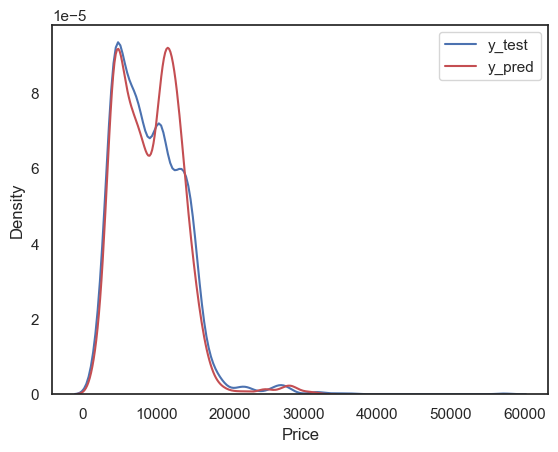

In [91]:
# Actual vs Predicted graph 
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_rf, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

## **GradientBoosting Regressor**

In [93]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [94]:
y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)

In [95]:
# Evaluation
print("********** GradientBoosting Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ', r2_score(y_train, y_pred_train_gbr))
print('Testing_Accuracy (R²): ', r2_score(y_test, y_pred_test_gbr))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_gbr))
print("MSE:", mean_squared_error(y_test, y_pred_test_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_gbr)))


********** GradientBoosting Regressor **********
Training_Accuracy (R²):  0.7856952968350256
Testing_Accuracy (R²):  0.7871724247857572
MAE: 1521.1605422013288
MSE: 4589000.164104281
RMSE: 2142.1951741389676


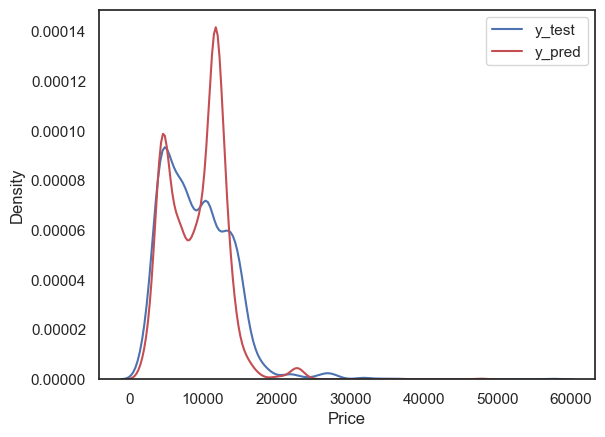

In [96]:
# Plot
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_gbr, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

## **XGBoost Regressor**

In [98]:
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [99]:
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

In [100]:
# Evaluation
print("********** XGBoost Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train,y_pred_train_xgb))
print('Testing_Accuracy (R²): ',r2_score(y_test,y_pred_test_xgb))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_test_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)))


********** XGBoost Regressor **********
Training_Accuracy (R²):  0.9347913338166732
Testing_Accuracy (R²):  0.852595843586051
MAE: 1156.2470045076334
MSE: 3178336.723013123
RMSE: 1782.7890293058017


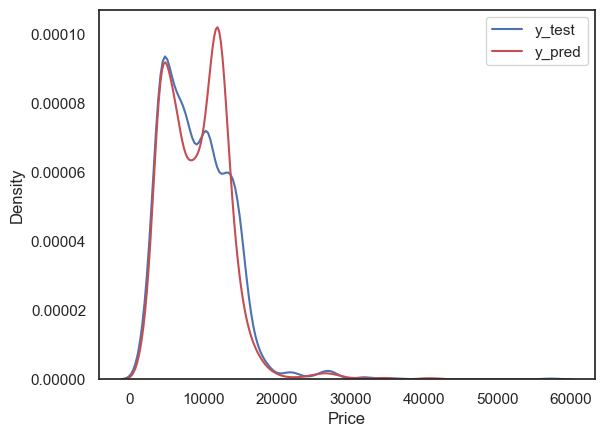

In [101]:
# Actual vs Predicted graph
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_xgb, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

## **CatBoost Regressor**

In [103]:
!pip install catboost

In [104]:
from catboost import CatBoostRegressor

In [105]:
# CatBoost Regressor
cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(X_train, y_train)

In [106]:
y_pred_train_cat = cat.predict(X_train)
y_pred_test_cat = cat.predict(X_test)

In [107]:
# Evaluation
print("********** CatBoost Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ', r2_score(y_train, y_pred_train_cat))
print('Testing_Accuracy (R²): ', r2_score(y_test, y_pred_test_cat))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_cat))
print("MSE:", mean_squared_error(y_test, y_pred_test_cat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_cat)))


********** CatBoost Regressor **********
Training_Accuracy (R²):  0.9099001235711003
Testing_Accuracy (R²):  0.8637397909496379
MAE: 1161.4391498584196
MSE: 2938050.302285966
RMSE: 1714.0741822587393


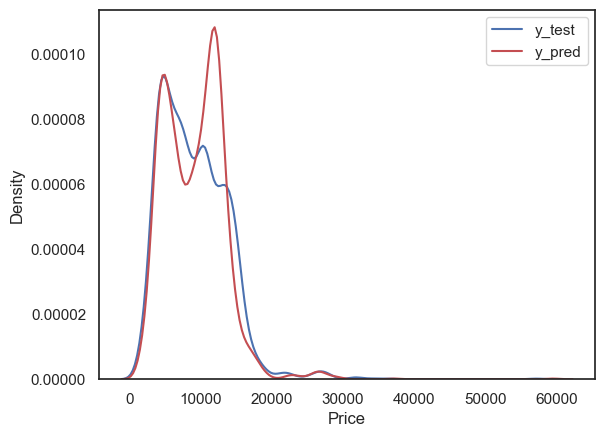

In [108]:
# Actual vs Predicted graph
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_cat, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

## **LightGBM Regressor**

In [110]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 24
[LightGBM] [Info] Start training from score 9078.336688


LGBMRegressor(random_state=42)

In [111]:
y_pred_train_lgbm = lgbm.predict(X_train)
y_pred_test_lgbm = lgbm.predict(X_test)

In [112]:
# Evaluation
print("********** LightGBM Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ', r2_score(y_train, y_pred_train_lgbm))
print('Testing_Accuracy (R²): ', r2_score(y_test, y_pred_test_lgbm))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_lgbm))
print("MSE:", mean_squared_error(y_test, y_pred_test_lgbm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_lgbm)))

********** LightGBM Regressor **********
Training_Accuracy (R²):  0.8730294135704895
Testing_Accuracy (R²):  0.8260247560748051
MAE: 1250.4256013948986
MSE: 3751264.008524838
RMSE: 1936.81801120416


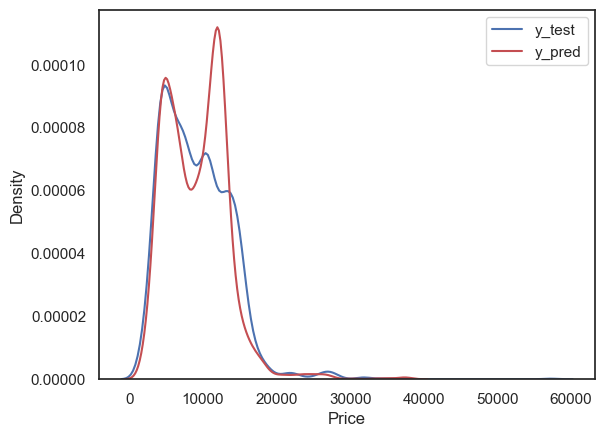

In [113]:
# Actual vs Predicted graph
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_lgbm, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

# **Model Comparison Table**

In [115]:
# Model comparison data
data = [
    ['Linear Regression',  0.6137, 0.5999, 1995.94, 8625736.14, 2936.96],
    ['Decision Tree Regressor', 0.9692, 0.7292, 1331.49, 5839293.81, 2416.46],
    ['Random Forest Regressor', 0.9536, 0.7926, 1186.63, 4471926.09,  2114.69],
    ['GradientBoosting Regressor', 0.7857,  0.7872, 1521.16, 4589000.16, 2142.20],
    ['XGBoost Regressor', 0.9348, 0.8526, 1156.25, 3178336.72, 1782.79],
    ['CatBoost Regressor', 0.9099, 0.8637, 1161.44, 2938050.30, 1714.07],
    ['LightGBM Regressor', 0.8730, 0.8260, 1250.42, 3751264.01, 1936.82]
]

# Column names
headers = ['Model', 'Training_Accuracy (R²)', 'Testing_Accuracy (R²)', 'MAE', 'MSE', 'RMSE']

# Create DataFrame
df_models = pd.DataFrame(data, columns=headers)

# Set 'Model' as index
df_models.set_index('Model', inplace=True)

df_models['MSE'] = df_models['MSE'].apply(lambda x: '{:.2f}'.format(x))

# Round to 4 decimal places
df_models = df_models.round(4)

# Display the DataFrame
display(df_models)

,Training_Accuracy (R²),Testing_Accuracy (R²),MAE,MSE,RMSE
Model,,,,,
Linear Regression,0.6137,0.5999,1995.94,8625736.14,2936.96
Decision Tree Regressor,0.9692,0.7292,1331.49,5839293.81,2416.46
Random Forest Regressor,0.9536,0.7926,1186.63,4471926.09,2114.69
GradientBoosting Regressor,0.7857,0.7872,1521.16,4589000.16,2142.20
XGBoost Regressor,0.9348,0.8526,1156.25,3178336.72,1782.79
CatBoost Regressor,0.9099,0.8637,1161.44,2938050.30,1714.07
LightGBM Regressor,0.8730,0.8260,1250.42,3751264.01,1936.82


## **Hyperparameter Tuning: Random Forest Regressor**

In [117]:
rf_model = RandomForestRegressor(random_state=42)

In [118]:
# Define hyperparameters
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [119]:
# RandomizedSearchCV
rf_search = RandomizedSearchCV(rf_model, rf_params, 
                               scoring='neg_root_mean_squared_error', 
                               cv=5, n_iter=15, n_jobs=-1, random_state=42)

rf_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [120]:
print("Best RF Parameters:", rf_search.best_params_)
print("Best RMSE Score:", -rf_search.best_score_)

Best RF Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best RMSE Score: 2063.033960790751


In [121]:
# Best Model
best_rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

In [122]:
# Best Fit
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=10,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [123]:
# Predictions
y_pred_train_rf_model = best_rf_model.predict(X_train)
y_pred_test_rf_model = best_rf_model.predict(X_test)

In [124]:
# Evaluation
print("********** Random Forest Regressor Tuned **********")

# R² Scores
print('Training_Accuracy (R²): ', r2_score(y_train, y_pred_train_rf_model))
print('Testing_Accuracy (R²): ', r2_score(y_test, y_pred_test_rf_model))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_rf_model))
print("MSE:", mean_squared_error(y_test, y_pred_test_rf_model))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_rf_model)))


********** Random Forest Regressor Tuned **********
Training_Accuracy (R²):  0.88219633252774
Testing_Accuracy (R²):  0.8263895400717074
MAE: 1258.069960643843
MSE: 3743398.515437479
RMSE: 1934.7864263110487


## **Hyperparameter Tuning: XGBoost Regressor**

In [126]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [127]:
xgb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1, 10]
}

In [128]:
xgb_search = RandomizedSearchCV(xgb_model, xgb_params, 
                                scoring='neg_root_mean_squared_error', 
                                cv=5, n_iter=15, n_jobs=-1, random_state=42)

xgb_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 300, 500],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [0.1, 1, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [129]:
print("Best XGBoost Parameters:", xgb_search.best_params_)
print("Best RMSE Score:", -xgb_search.best_score_)

Best XGBoost Parameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best RMSE Score: 1877.4107483902712


In [130]:
best_xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.6,
    reg_alpha=0,
    reg_lambda=10,
    objective='reg:squarederror',
    random_state=42
)

In [131]:
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [132]:
y_pred_train_xgb_model = best_xgb_model.predict(X_train)
y_pred_test_xgb_model = best_xgb_model.predict(X_test)

In [133]:
# Evaluation
print("********** XGBoost Regressor Tuned **********")

# R² Scores
print('Training_Accuracy (R²): ', r2_score(y_train, y_pred_train_xgb_model))
print('Testing_Accuracy (R²): ', r2_score(y_test, y_pred_test_xgb_model))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_xgb_model))
print("MSE:", mean_squared_error(y_test, y_pred_test_xgb_model))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb_model)))


********** XGBoost Regressor Tuned **********
Training_Accuracy (R²):  0.9233548658376752
Testing_Accuracy (R²):  0.8595107511024612
MAE: 1141.0315283568707
MSE: 3029237.097667915
RMSE: 1740.4703667882181


## **Hyperparameter Tuning: CatBoost Regressor**

In [135]:
cat_model = CatBoostRegressor(verbose=0)

In [136]:
cat_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'iterations': [300, 500, 700],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

In [137]:
cat_search = RandomizedSearchCV(cat_model, cat_params, 
                                scoring='neg_root_mean_squared_error', 
                                cv=5, n_iter=10, n_jobs=-1, random_state=42)

cat_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000026B0B81D160>,
                   n_jobs=-1,
                   param_distributions={'depth': [4, 6, 8, 10],
                                        'iterations': [300, 500, 700],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [138]:
print("Best CatBoost Parameters:", cat_search.best_params_)
print("Best RMSE Score:", -cat_search.best_score_)

Best CatBoost Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 8}
Best RMSE Score: 1917.182264624081


In [139]:
best_cat_model = CatBoostRegressor(
    learning_rate=0.1,
    l2_leaf_reg=5,
    iterations=500,
    depth=8,
    verbose=0,
    random_state=42
)

best_cat_model.fit(X_train, y_train)

In [140]:
y_pred_train_cat_model = best_cat_model.predict(X_train)
y_pred_test_cat_model = best_cat_model.predict(X_test)

In [141]:
# Evaluation
print("********** CatBoost Regressor Tuned **********")

# R² Scores
print('Training_Accuracy (R²): ', r2_score(y_train, y_pred_train_cat_model))
print('Testing_Accuracy (R²): ', r2_score(y_test, y_pred_test_cat_model))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_cat_model))
print("MSE:", mean_squared_error(y_test, y_pred_test_cat_model))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_cat_model)))

********** CatBoost Regressor Tuned **********
Training_Accuracy (R²):  0.9240586988410917
Testing_Accuracy (R²):  0.865101751598041
MAE: 1139.9004555732367
MSE: 2908683.630073808
RMSE: 1705.4863324206992


# **Model Comparison After Hyperparameter Tuning**

In [143]:
# Model comparison data
data = [
    ['Random Forest Regressor', 0.8822, 0.8264, 1258.07, 3743398.52, 1934.79],
    ['XGBoost Regressor', 0.9234, 0.8595, 1141.03, 3029237.10, 1740.47],
    ['CatBoost Regressor', 0.9241, 0.8651, 1139.90, 2908683.63, 1705.49]
]

# Column names
headers = ['Model', 'Training_Accuracy (R²)', 'Testing_Accuracy (R²)', 'MAE', 'MSE', 'RMSE']

# Create DataFrame
df_models = pd.DataFrame(data, columns=headers)

# Set 'Model' as index
df_models.set_index('Model', inplace=True)

df_models['MSE'] = df_models['MSE'].apply(lambda x: '{:.2f}'.format(x))

# Round to 4 decimal places
df_models = df_models.round(4)

# Display the DataFrame
display(df_models)

,Training_Accuracy (R²),Testing_Accuracy (R²),MAE,MSE,RMSE
Model,,,,,
Random Forest Regressor,0.8822,0.8264,1258.07,3743398.52,1934.79
XGBoost Regressor,0.9234,0.8595,1141.03,3029237.10,1740.47
CatBoost Regressor,0.9241,0.8651,1139.90,2908683.63,1705.49


# **📊 Final Model Comparison**

In [145]:
# Model comparison data
data = [
    ['Linear Regression',  0.6137, 0.5999, 1995.94, 8625736.14, 2936.96],
    ['Decision Tree Regressor', 0.9692, 0.7292, 1331.49, 5839293.81, 2416.46],
    ['Random Forest Regressor', 0.8822, 0.8264, 1258.07, 3743398.52, 1934.79],
    ['GradientBoosting Regressor', 0.7857,  0.7872, 1521.16, 4589000.16, 2142.20],
    ['XGBoost Regressor', 0.9234, 0.8595, 1141.03, 3029237.10, 1740.47],
    ['CatBoost Regressor', 0.9241, 0.8651, 1139.90, 2908683.63, 1705.49],
    ['LightGBM Regressor', 0.8730, 0.8260, 1250.42, 3751264.01, 1936.82]   
]

# Column names
headers = ['Model', 'Training_Accuracy (R²)', 'Testing_Accuracy (R²)', 'MAE', 'MSE', 'RMSE']

# Create DataFrame
df_models = pd.DataFrame(data, columns=headers)

# Set 'Model' as index
df_models.set_index('Model', inplace=True)

df_models['MSE'] = df_models['MSE'].apply(lambda x: '{:.2f}'.format(x))

# Round to 4 decimal places
df_models = df_models.round(4)

# Display the DataFrame
display(df_models)

,Training_Accuracy (R²),Testing_Accuracy (R²),MAE,MSE,RMSE
Model,,,,,
Linear Regression,0.6137,0.5999,1995.94,8625736.14,2936.96
Decision Tree Regressor,0.9692,0.7292,1331.49,5839293.81,2416.46
Random Forest Regressor,0.8822,0.8264,1258.07,3743398.52,1934.79
GradientBoosting Regressor,0.7857,0.7872,1521.16,4589000.16,2142.20
XGBoost Regressor,0.9234,0.8595,1141.03,3029237.10,1740.47
CatBoost Regressor,0.9241,0.8651,1139.90,2908683.63,1705.49
LightGBM Regressor,0.8730,0.8260,1250.42,3751264.01,1936.82


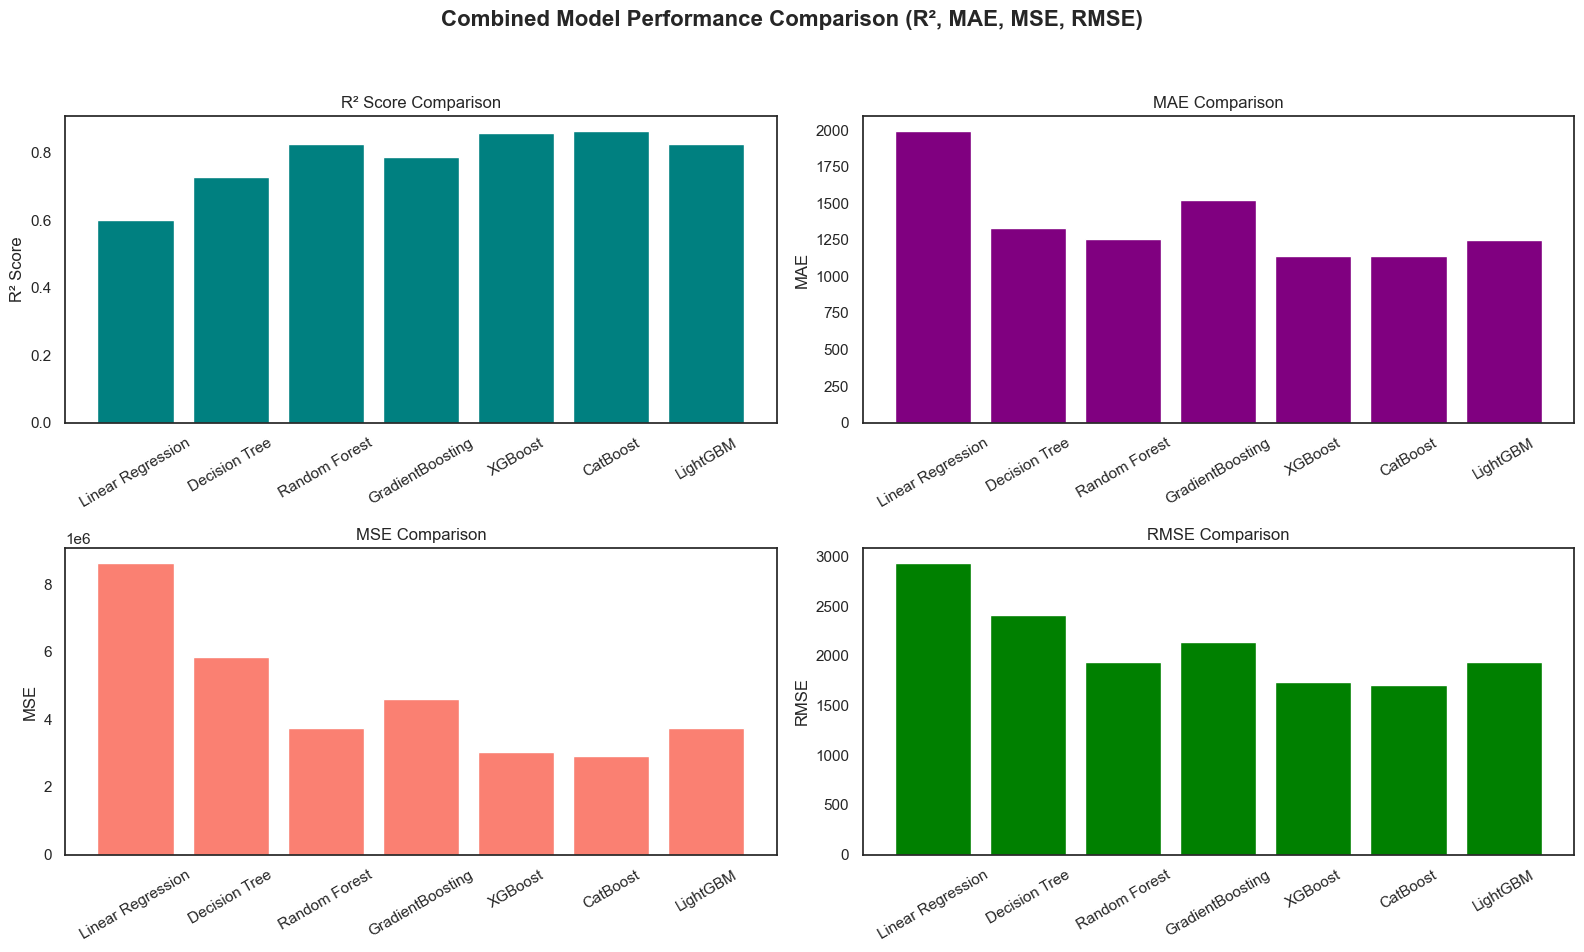

In [146]:
# Models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'GradientBoosting', 'XGBoost', 'CatBoost', 'LightGBM']

# Metric Values 
r2 = [0.5999, 0.7292, 0.8264, 0.7872, 0.8595, 0.8651, 0.8260]
mae = [1995.94, 1331.49, 1258.07, 1521.16, 1141.03, 1139.90, 1250.42]
mse = [8625736.14, 5839293.81, 3743398.52, 4589000.16, 3029237.10, 2908683.63, 3751264.01]
rmse = [2936.96, 2416.46, 1934.79, 2142.20, 1740.47, 1705.49, 1936.82]


# Set up 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# R² Plot
axes[0, 0].bar(models, r2, color='Teal')
axes[0, 0].set_title('R² Score Comparison')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=30)

# MAE Plot
axes[0, 1].bar(models, mae, color='Purple')
axes[0, 1].set_title('MAE Comparison')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].tick_params(axis='x', rotation=30)

# MSE Plot
axes[1, 0].bar(models, mse, color='salmon')
axes[1, 0].set_title('MSE Comparison')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].tick_params(axis='x', rotation=30)

# RMSE Plot
axes[1, 1].bar(models, rmse, color='green')
axes[1, 1].set_title('RMSE Comparison')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].tick_params(axis='x', rotation=30)

# title and layout
plt.suptitle('Combined Model Performance Comparison (R², MAE, MSE, RMSE)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

🏆 **Best Model: CatBoost Regressor** (better performance on all evaluation metrics)  
**Reason for Selection:**  

**Highest Testing Accuracy (R²):** `0.8651`  
**Lowest MAE:** `1139.90`  
**Lowest MSE:** `2908683.63`  
**Lowest RMSE:** `1705.49`

# **Feature Importances: CatBoost Regressor**

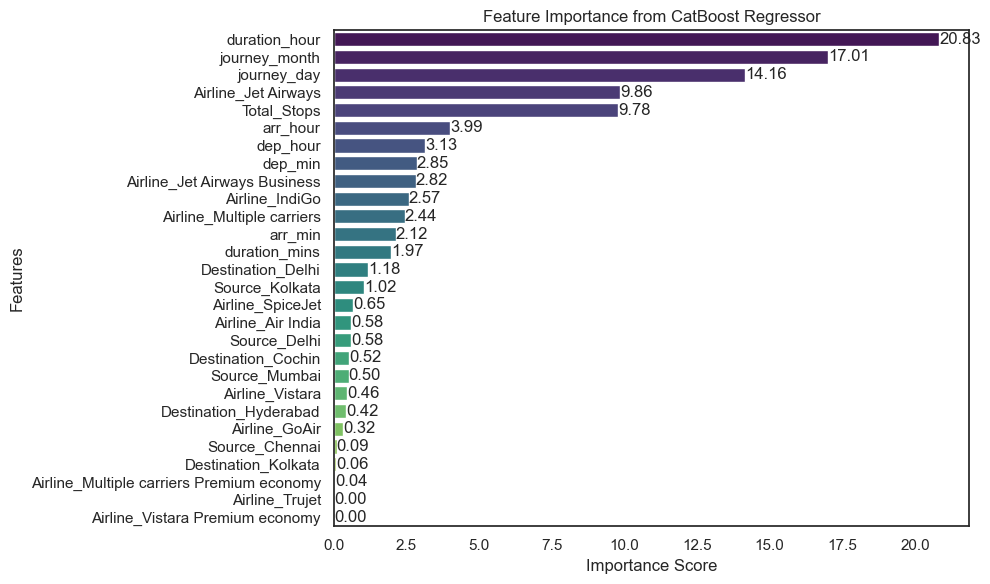

In [149]:
importances_cat = cat.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp_cat = pd.DataFrame({'Feature': feature_names, 'Importance': importances_cat})
feat_imp_cat = feat_imp_cat.sort_values(by='Importance', ascending=False)

# Plot with value labels
plt.figure(figsize=(10, 6))
sns.barplot(data = feat_imp_cat, x='Importance', y='Feature', palette='viridis')

# Add labels to each bar
for index, value in enumerate(feat_imp_cat['Importance']):
    plt.text(value + 0.001, index, f"{value:.2f}", va='center')

plt.title('Feature Importance from CatBoost Regressor')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [150]:
# Save the model to reuse it again while deploy the model
import joblib

file = 'catboost_fare_model.pkl'
joblib.dump(best_cat_model, file)

['catboost_fare_model.pkl']

In [271]:
# Load the model
model = joblib.load('catboost_fare_model.pkl')
cat_model = model